# STOCK PICKING 3 - FORECASTING ARIMAs 

_In mental hospitals there are two kinds of people: who they think to be Napoleon and who they think they can estimate confidence in predicting stock prices_ (Gino Tesei). 

## Getting data

Let's consider all the large caps listed on NASDAQ and NYSE (~1000 stocks). 

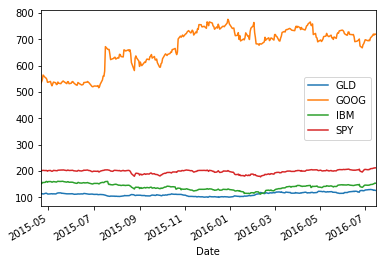

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

def get_data(symbols, 
             add_ref=True,
             data_source='yahoo',
             price='Adj Close',
             start='1/21/2010', 
             end='4/15/2016'):
    """Read stock data (adjusted close) for given symbols from."""
    
    if add_ref and 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    df = web.DataReader(symbols, 
                        data_source=data_source,
                        start=start, 
                        end=end)
    
    return df[price,:,:]

def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = (df / df.shift(1)) - 1 
    daily_returns.ix[0,:] = 0 
    return daily_returns

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill',inplace=True)
    df_data.fillna(method='backfill',inplace=True)
    return df_data

def cumulative_returns(df):
    return df/df.ix[0,:] - 1 

df = fill_missing_values(get_data(symbols=['GOOG','SPY','IBM','GLD'],
                             start='4/21/2015', 
                             end='7/15/2016'))
df.plot()
plt.show(1)

In [2]:
df.head()

,GLD,GOOG,IBM,SPY
Date,,,,
2015-04-21,115.379997,533.972413,151.610189,201.067670
2015-04-22,113.830002,539.367458,152.625483,202.055740
2015-04-23,114.660004,547.002472,157.129675,202.564164
2015-04-24,113.050003,565.062561,156.705093,203.034208
2015-04-27,115.330002,555.369995,157.581930,202.190041


In [3]:
simbols = ["A","AA","AAL","AAP","AAPL","ABB","ABBV","ABC","ABMD","ABT","ABX","ACC","ACGL","ACM","ACN","ADBE","ADI","ADM","ADNT","ADP","ADS","ADSK","AEE","AEG","AEM","AEP","AER","AES","AET","AFG","AFL","AGCO","AGN","AGNC","AGR","AGU","AIG","AIV","AIZ","AJG","AKAM","ALB","ALGN","ALK","ALKS","ALL","ALLE","ALLY","ALSN","ALV","ALXN","AM","AMAT","AMD","AME","AMG","AMGN","AMH","AMP","AMT","AMTD","AMX","AMZN","ANET","ANSS","ANTM","AON","AOS","APA","APC","APD","APH","APO","AR","ARCC","ARD","ARE","ARMK","ARNC","ARRS","ARW","ASH","ASML","ASR","ASX","ATH","ATO","ATR","ATVI","AVB","AVGO","AVY","AWK","AXP","AXS","AXTA","AYI","AZN","AZO","BA","BABA","BAC","BAH","BAM","BAP","BAX","BBBY","BBD","BBL","BBRY","BBT","BBVA","BBY","BC","BCE","BCH","BCR","BCS","BDX","BEN","BERY","BF.B","BG","BHI","BHP","BIDU","BIIB","BIO","BIP","BIVV","BK","BKFS","BLK","BLL","BMA","BMO","BMRN","BMY","BNS","BOKF","BP","BPL","BPY","BR","BRCD","BRFS","BRK.A","BRO","BRX","BSAC","BSBR","BSMX","BSX","BT","BUD","BURL","BWA","BX","BXP","C","CA","CAG","CAH","CAJ","CAT","CB","CBG","CBOE","CBS","CBSH","CC","CCE","CCI","CCK","CCL","CDK","CDNS","CDW","CE","CELG","CEO","CERN","CF","CFG","CFR","CG","CGNX","CHA","CHD","CHK","CHKP","CHL","CHRW","CHT","CHTR","CHU","CI","CINF","CIT","CL","CLNS","CLR","CLX","CM","CMA","CMCSA","CME","CMG","CMI","CMS","CNA","CNC","CNHI","CNI","CNK","CNP","CNQ","COF","COG","COH","COHR","COL","COMM","COO","COP","COST","COTY","CP","CPA","CPB","CPL","CPRT","CPT","CRH","CRM","CS","CSCO","CSGP","CSL","CSX","CTAS","CTL","CTRP","CTSH","CTXS","CUK","CVE","CVS","CVX","CX","CXO","D","DAL","DB","DCI","DCM","DCP","DD","DE","DEI","DEO","DFS","DG","DGX","DHI","DHR","DIS","DISH","DKS","DLB","DLPH","DLR","DLTR","DNKN","DOV","DOW","DOX","DPS","DPZ","DRE","DRI","DTE","DUK","DVA","DVMT","DVN","DXC","DXCM","E","EA","EBAY","EC","ECA","ECL","ED","EDU","EEP","EFX","EGN","EIX","EL","ELS","EMN","EMR","ENB","ENBL","ENIA","ENIC","ENLK","EOCC","EOG","EPD","EPR","EQGP","EQIX","EQM","EQR","EQT","ERIC","ERIE","ES","ESLT","ESRX","ESS","ETE","ETFC","ETN","ETR","EV","EVHC","EW","EWBC","EXC","EXEL","EXPD","EXPE","EXR","F","FANG","FAST","FB","FBHS","FBR","FCE.A","FCX","FDC","FDS","FDX","FE","FFIV","FIS","FISV","FITB","FL","FLEX","FLIR","FLR","FLS","FLT","FMC","FMS","FMX","FNF","FOXA","FRC","FRT","FTI","FTNT","FTV","G","GD","GDDY","GE","GG","GGG","GGP","GIB","GIL","GILD","GIS","GLPI","GLW","GM","GNTX","GOLD","GOOGL","GPC","GPN","GPS","GRMN","GS","GSK","GT","GWW","GXP","H","HAL","HAS","HBAN","HBI","HCA","HCN","HCP","HD","HDB","HDS","HES","HFC","HHC","HIG","HII","HIW","HLF","HLT","HMC","HOG","HOLX","HON","HP","HPE","HPP","HPQ","HRB","HRL","HRS","HSBC","HSIC","HST","HSY","HTA","HTHT","HUBB","HUM","HUN","IAC","IBKR","IBM","IBN","ICE","IDXX","IEP","IEX","IFF","IHG","ILMN","INCY","INFO","INFY","ING","INGR","INTC","INTU","INVH","IONS","IP","IPG","IPGP","IR","IRM","ISRG","IT","ITUB","ITW","IVZ","IX","JAZZ","JBHT","JBL","JBLU","JD","JEC","JHX","JKHY","JLL","JNJ","JNPR","JPM","JWN","K","KAR","KB","KEP","KEY","KEYS","KHC","KIM","KKR","KLAC","KMB","KMI","KMX","KO","KORS","KR","KRC","KSS","KSU","KT","KYO","L","LAMR","LAZ","LB","LBTYA","LDOS","LEA","LECO","LEG","LEN","LFC","LFL","LH","LII","LKQ","LLL","LLY","LMT","LN","LNC","LNT","LOGI","LOGM","LOW","LPL","LPT","LRCX","LUK","LULU","LUV","LUX","LVLT","LVS","LW","LYB","LYG","LYV","M","MA","MAA","MAC","MAN","MAR","MAS","MAT","MBLY","MBT","MCD","MCHP","MCK","MCO","MD","MDLZ","MDT","MDU","MELI","MET","MFC","MFG","MGA","MGM","MHK","MIC","MIDD","MJN","MKC","MKL","MKTX","MLCO","MLM","MMC","MMM","MMP","MNST","MO","MOMO","MON","MOS","MPC","MPLX","MRK","MRO","MRVL","MS","MSCC","MSCI","MSFT","MSI","MSM","MT","MTB","MTD","MTN","MTU","MU","MXIM","MYL","NBL","NCLH","NCR","NDAQ","NDSN","NEE","NEM","NEU","NFLX","NFX","NGG","NI","NKE","NLSN","NLY","NMR","NNN","NOC","NOK","NOV","NOW","NRZ","NSC","NTAP","NTES","NTRS","NUAN","NUE","NVDA","NVO","NVR","NVS","NWL","NXPI","NYCB","O","OA","OAK","OC","ODFL","OGE","OHI","OKE","OKS","OLED","OLN","OMC","ON","ORAN","ORCL","ORI","ORLY","OSK","OTEX","OXY","OZRK","PAA","PAC","PACW","PAGP","PANW","PAYX","PBCT","PBR","PCAR","PCG","PCLN","PE","PEG","PEP","PF","PFE","PFG","PG","PGR","PH","PHG","PHI","PHM","PII","PK","PKG","PKI","PKX","PLD","PM","PNC","PNR","PNRA","PNW","POOL","POST","POT","PPC","PPG","PPL","PRGO","PRU","PSA","PSO","PSX","PSXP","PTC","PTR","PUK","PVH","PWR","PX","PXD","PYPL","Q","QCOM","QGEN","QRVO","QVCA","RACE","RAI","RBS","RCI","RCL","RDS.A","RDY","RE","REG","REGN","RELX","RENX","RF","RGA","RHI","RHT","RIO","RJF","RL","RMD","RNR","ROK","ROL","ROP","ROST","RPM","RRC","RS","RSG","RSPP","RTN","RY","RYAAY","S","SABR","SAN","SAP","SATS","SBAC","SBNY","SBS","SBUX","SCCO","SCG","SCHW","SCI","SEE","SEIC","SEP","SERV","SGEN","SHG","SHLX","SHOP","SHPG","SHW","SINA","SIRI","SIVB","SIX","SJM","SJR","SKM","SLB","SLF","SLG","SLM","SLW","SMFG","SMG","SMI","SNA","SNAP","SNE","SNI","SNN","SNP","SNPS","SNV","SNY","SO","SON","SPB","SPG","SPGI","SPLK","SPLS","SPR","SQ","SRCL","SRE","SSL","SSNC","ST","STE","STI","STLD","STM","STO","STT","STWD","STX","STZ","SU","SUI","SWK","SWKS","SYF","SYK","SYMC","SYT","SYY","T","TAL","TAP","TD","TDG","TEAM","TECK","TEF","TEL","TER","TEVA","TFX","TGNA","TGT","TI","TIF","TJX","TKC","TLK","TLLP","TM","TMK","TMO","TMUS","TOL","TOT","TRGP","TRI","TRIP","TRMB","TROW","TRP","TRQ","TRU","TRV","TS","TSCO","TSLA","TSM","TSN","TSO","TSRO","TSS","TSU","TTC","TTM","TTWO","TU","TV","TWTR","TWX","TXN","TXT","TYL","UAL","UBS","UDR","UGI","UGP","UHAL","UHS","UL","ULTA","ULTI","UMC","UN","UNH","UNM","UNP","UPS","URI","USB","USFD","UTHR","UTX","V","VAL","VALE","VAR","VEDL","VEEV","VEON","VER","VFC","VIAB","VIPS","VIV","VLO","VMC","VMW","VNO","VNTV","VOD","VOYA","VRSK","VRSN","VRTX","VTR","VZ","W","WAB","WAL","WAT","WB","WBA","WBC","WBK","WCG","WCN","WDAY","WDC","WEC","WES","WF","WFC","WFM","WFT","WGP","WHR","WIT","WLK","WLTW","WM","WMB","WMT","WOOF","WPC","WPPGY","WPZ","WR","WRB","WRK","WST","WTR","WU","WUBA","WY","WYN","WYNN","XEC","XEL","XL","XLNX","XOM","XPO","XRAY","XRX","XYL","Y","YHOO","YNDX","YPF","YUM","YUMC","ZAYO","ZBH","ZBRA","ZION","ZTO","ZTS"]

In [4]:
len(simbols)

983

In [5]:
DELTA = 45 ## delay in days 
start_date = (datetime.date.today() - datetime.timedelta(DELTA)).strftime("%m-%d-%Y")
print("start_date",start_date)

start_date 03-28-2017


In [6]:
end_date = (datetime.date.today()).strftime("%m-%d-%Y")
print("end_date",end_date)

end_date 05-12-2017


In [7]:
df = fill_missing_values(get_data(symbols=simbols,
                             start=start_date, 
                             end=end_date))

C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\pandas_datareader\base.py:192: SymbolWarning: Failed to read symbol: 'BF.B', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\pandas_datareader\base.py:192: SymbolWarning: Failed to read symbol: 'BRK.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\pandas_datareader\base.py:192: SymbolWarning: Failed to read symbol: 'FCE.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
C:\Users\gtesei\AppData\Local\Continuum\Miniconda3\lib\site-packages\pandas_datareader\base.py:192: SymbolWarning: Failed to read symbol: 'RDS.A', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [8]:
df.shape

(32, 984)

In [9]:
df.head()

,A,AA,AAL,AAP,AAPL,ABB,ABBV,ABC,ABMD,ABT,...,YNDX,YPF,YUM,YUMC,ZAYO,ZBH,ZBRA,ZION,ZTO,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-28,53.307702,32.919998,42.599998,148.360001,143.208894,22.665505,65.330055,87.500000,125.050003,44.428253,...,22.430000,23.900000,64.168410,26.549999,32.900002,120.950002,88.580002,41.299999,12.88,54.053044
2017-03-29,52.988494,32.910000,41.959999,149.669998,143.527571,22.588149,65.122117,89.510002,124.879997,44.398432,...,22.240000,23.850000,63.750376,26.610001,32.910000,121.370003,88.830002,41.320000,13.27,53.713715
2017-03-30,53.188000,33.490002,42.540001,148.669998,143.338349,22.568809,64.815174,89.139999,125.000000,44.279163,...,22.059999,24.180000,63.720510,26.520000,32.810001,121.360001,89.559998,42.380001,13.01,53.364408
2017-03-31,52.869999,34.400002,42.299999,148.259995,143.069470,22.626826,64.518133,88.500000,125.199997,44.140015,...,21.930000,24.280001,63.601077,27.200001,32.900002,122.110001,91.250000,42.000000,13.09,53.264603
2017-04-03,53.200001,34.220001,42.450001,145.500000,143.109299,22.472113,64.389409,87.330002,125.050003,44.199651,...,22.129999,24.700001,63.252712,27.200001,32.930000,121.349998,91.430000,41.770000,12.30,53.064997


In [10]:
pd.isnull(df).sum().sum()

128

In [11]:
to_remove = pd.isnull(df).sum()[pd.isnull(df).sum() > 0]
to_remove

BF.B     32
BRK.A    32
FCE.A    32
RDS.A    32
dtype: int64

In [12]:
to_remove.index

Index(['BF.B', 'BRK.A', 'FCE.A', 'RDS.A'], dtype='object')

In [13]:
df = df.drop(to_remove.index,axis=1)

In [14]:
pd.isnull(df).sum().sum()

0

In [15]:
df.shape

(32, 980)

## ARIMA

In order to select best model we will use the [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion), i.e. we will take the model with __lowest AIC__. 

### How it works on 1 security 

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## let's start with an example 
series = df["AAPL"]
series = series.tolist()

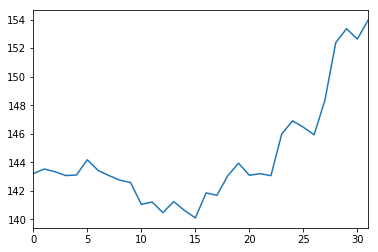

In [17]:
pd.Series(series).plot()
plt.show()

In [18]:
p_tr = 0.66

tr_size = int(len(series) * p_tr)
train, test = series[0:tr_size], series[tr_size:len(series)]
print("tr_size:",tr_size,"xval_size:",(len(series)-tr_size))

tr_size: 21 xval_size: 11


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   21
Model:                     ARMA(5, 0)   Log Likelihood                 -21.813
Method:                       css-mle   S.D. of innovations              0.655
Date:                Fri, 12 May 2017   AIC                             57.625
Time:                        17:23:40   BIC                             64.937
Sample:                             0   HQIC                            59.212
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        142.4805      0.394    361.613      0.000     141.708     143.253
ar.L1.y        0.5546      0.219      2.533      0.023       0.125       0.984
ar.L2.y        0.3659      0.264      1.384      0.1

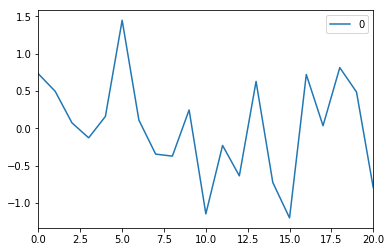

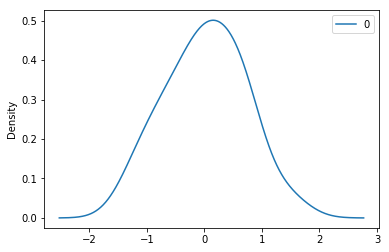

               0
count  21.000000
mean    0.017688
std     0.685996
min    -1.199004
25%    -0.372014
50%     0.073872
75%     0.495655
max     1.446828


In [19]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(train, order=(5,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [20]:
model_fit.aic

57.625096989071324

In [21]:
from numpy.linalg import LinAlgError

def get_best_arima(sr,maxord = [6,6,6]):
    best_aic = 1000000
    best_ord = maxord
    best_model = None 
    for p in range(maxord[0]):
        for q in range(maxord[1]):
            for d in range(maxord[2]):
                try: 
                    model = ARIMA(sr, order=(p,q,d))
                    model_fit = model.fit(disp=0)
                    if (best_aic > model_fit.aic):
                        best_aic = model_fit.aic
                        best_ord = [p,q,d]
                        best_model = model_fit 
                except: 
                    pass
    return best_aic, best_ord , best_model

In [22]:
# supress warnings 
import warnings
warnings.filterwarnings('ignore')

In [23]:
best_aic, best_ord , best_model = get_best_arima(train)
print("best_aic:",best_aic)
print("best_ord:",best_ord)

best_aic: 49.735119320259955
best_ord: [2, 0, 2]


In [24]:
def predict_arima(train,steps,best_order,verbose=True,do_plot=True):
    history = [x for x in train]
    predictions = list()
    yhat = train[len(train)-1]
    for t in range(steps):
        model = ARIMA(history, order=(best_order[0],best_order[1],best_order[2]))
        try:
            model_fit = model.fit(disp=0)
            output = model_fit.forecast()
        except:
            pass
        if not(np.isnan(output[0] )) and not(np.isinf(output[0])): 
            yhat = np.asscalar(output[0])
        predictions.append(yhat)
        history.append(yhat)
    return predictions

In [25]:
predictions = predict_arima(train,len(test),best_ord,verbose=True,do_plot=True)
MSE = mean_squared_error(test, predictions)
print("MSE:",MSE)

MSE: 35.0570845287


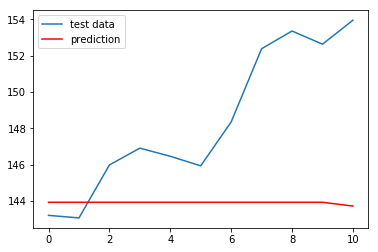

In [26]:
pyplot.plot(test , label="test data")    
pyplot.plot(predictions, color='red' , label="prediction")
pyplot.legend()
pyplot.show()

In [27]:
def predict_arima_worse(train,steps,best_order,verbose=True,do_plot=True):
    history = [x for x in train]
    predictions = list()
    model = ARIMA(history, order=(best_order[0],best_order[1],best_order[2]))
    try:
        model_fit = model.fit(disp=0)
        output = model_fit.forecast(steps=steps)
    except:
        pass
    yhat = history[len(history)-1]
    for i in range(steps): 
        if not(np.isnan(output[0][i] )) and not(np.isinf(output[0][i])): 
            yhat = np.asscalar(output[0][i] )
        predictions.append(yhat)
    return predictions

In [28]:
predictions = predict_arima_worse(train,len(test),best_ord,verbose=True,do_plot=True)
MSE = mean_squared_error(test, predictions)
print("MSE:",MSE)

MSE: 59.4889326175


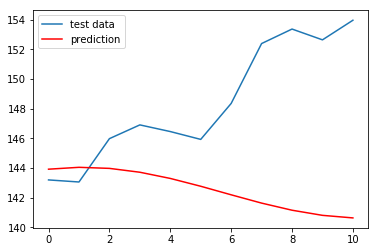

In [29]:
pyplot.plot(test , label="test data")    
pyplot.plot(predictions, color='red' , label="prediction")
pyplot.legend()
pyplot.show()

### Massive Predictions 

Let's do a simple experiments with above defined securities, i.e. for each security
* let's fit best ARIMA model on train period (oldest 60%)  
* let's predict stock price/cumulative return on cross-validation period (%20 in the middle)
* let's measure MSE/R2 for price/cumulative return on cross-validation period
* let's predict stock price/cumulative return on test period (most recent %20)
* let's measure MSE/R2 for price/cumulative return on test period

If we considered ARIMA models accurate then we should pick the securities with highest predicted cumulative return. Unfortunately, that would be a huge mistake. Why? Let's consider, for example in the cross validation period, predicted cumulative return vs. actual cumulative return. We would find out huge surprises. 

Another technique for model selection is using indicator like [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion) or [BIC](https://en.wikipedia.org/wiki/Bayesian_information_criterion) and actually in the below procedure we will use AIC to select the best ARIMA on train set data. The problem with those techniques is that they are very far from extimate the "confidence" of ARIMA predictions. 

Hence, the cross validation period is used to select the stock/arima pair. How? There are two possibilities: min [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) / max [R2](https://en.wikipedia.org/wiki/Coefficient_of_determination) on cross validation. Minimizing MSE would give more relevance to flat or quasi-flat securities, so we will prefer to use __max R2__. The idea is to BUY the top x stocks with higest R2 cumulative return in cross validation. 

The test period is for testing those orders in terms of cumulative returns.  

In [30]:
arima_perf = DataFrame({'security':  df.columns.tolist(), 
                        
                        'cumulative_return_test': 0, 
                        'ARIMA_pred_cumulative_return_test': 0, 
                        'ARIMA_MSE_cumulative_return_test': 0, 
                        'ARIMA_R2_cumulative_return_test': 0, 
                        'ARIMA_MSE_price_test': 0 ,
                        'ARIMA_R2_price_test': 0 ,
                        
                        'cumulative_return_xval': 0, 
                        'ARIMA_pred_cumulative_return_xval': 0, 
                        'ARIMA_MSE_cumulative_return_xval': 0, 
                        'ARIMA_R2_cumulative_return_xval': 0, 
                        'ARIMA_MSE_price_xval': 0 ,
                        'ARIMA_R2_price_xval': 0 , 
                        
                        'ARIMA_best_order_0': 0, 
                        'ARIMA_best_order_1': 0, 
                        'ARIMA_best_order_2': 0} )
arima_perf = arima_perf.set_index(['security'])

In [31]:
p_tr = 0.60
p_xval = 0.20
p_test = 1-p_tr-p_xval  

for i,sec in enumerate(arima_perf.index.tolist()):
    if (i % 100 == 0) or (i ==10):
        print(i,sec)
    
    ## data 
    series = df[sec]
    series = series.tolist()
    tr_size = int(len(series) * p_tr)
    xval_size = int(len(series) * p_xval)
    train, txval, test = series[0:tr_size], series[tr_size:(tr_size+xval_size)] , series[(tr_size+xval_size):len(series)]
    
    ## fit model 
    best_aic, best_ord , best_model = get_best_arima(train)
    
    ## predict, assess 
    predictions = predict_arima(train,(len(txval)+len(test)),best_ord,verbose=False,do_plot=False)
    
    ## store
    arima_perf.loc[sec,'ARIMA_best_order_0'] = best_ord[0]
    arima_perf.loc[sec,'ARIMA_best_order_1'] = best_ord[1]
    arima_perf.loc[sec,'ARIMA_best_order_2'] = best_ord[2]
    
    # xval 
    pred_cumulative_returns_xval = cumulative_returns(pd.Series(predictions[0:xval_size]))
    cumulative_returns_xval = cumulative_returns(pd.Series(txval))
    
    arima_perf.loc[sec,'cumulative_return_xval'] = cumulative_returns_xval[len(cumulative_returns_xval)-1]
    arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval'] = pred_cumulative_returns_xval[len(pred_cumulative_returns_xval)-1]
    arima_perf.loc[sec,'ARIMA_MSE_cumulative_return_xval'] = mean_squared_error(cumulative_returns_xval, pred_cumulative_returns_xval)
    arima_perf.loc[sec,'ARIMA_R2_cumulative_return_xval'] = r2_score(cumulative_returns_xval, pred_cumulative_returns_xval)
    arima_perf.loc[sec,'ARIMA_MSE_price_xval'] = mean_squared_error(txval, predictions[0:xval_size])
    arima_perf.loc[sec,'ARIMA_R2_price_xval'] = r2_score(txval, predictions[0:xval_size])
    
    # test 
    pred_cumulative_returns_test = cumulative_returns(pd.Series(predictions[xval_size:]))
    cumulative_returns_test = cumulative_returns(pd.Series(test))
    
    arima_perf.loc[sec,'cumulative_return_test'] = cumulative_returns_test[len(cumulative_returns_test)-1]
    arima_perf.loc[sec,'ARIMA_pred_cumulative_return_test'] = pred_cumulative_returns_test[len(pred_cumulative_returns_test)-1]
    arima_perf.loc[sec,'ARIMA_MSE_cumulative_return_test'] = mean_squared_error(cumulative_returns_test, pred_cumulative_returns_test)
    arima_perf.loc[sec,'ARIMA_R2_cumulative_return_test'] = r2_score(cumulative_returns_test, pred_cumulative_returns_test)
    arima_perf.loc[sec,'ARIMA_MSE_price_test'] = mean_squared_error(test, predictions[xval_size:])
    arima_perf.loc[sec,'ARIMA_R2_price_test'] = r2_score(test, predictions[xval_size:])
    
    if i == 5:
        break 

0 A


In [32]:
arima_perf.sort_values(by='ARIMA_MSE_price_test' , ascending=False).head(5)

,ARIMA_MSE_cumulative_return_test,ARIMA_MSE_cumulative_return_xval,ARIMA_MSE_price_test,ARIMA_MSE_price_xval,ARIMA_R2_cumulative_return_test,ARIMA_R2_cumulative_return_xval,ARIMA_R2_price_test,ARIMA_R2_price_xval,ARIMA_best_order_0,ARIMA_best_order_1,ARIMA_best_order_2,ARIMA_pred_cumulative_return_test,ARIMA_pred_cumulative_return_xval,cumulative_return_test,cumulative_return_xval
security,,,,,,,,,,,,,,,
AAP,0.001251,0.002538,393.883989,93.583475,-15.170917,-14.126773,-248.649086,-25.287753,0,2,1,9.086896e-02,5.227870e-02,0.021916,-0.021418
ABB,0.024093,0.010053,108.563000,8.667667,-1185.537134,-182.174342,-8826.681824,-267.787245,4,2,0,2.679850e-01,1.929188e-01,0.002438,0.018977
AAPL,0.001220,0.000123,65.973485,4.156296,-1.616267,-0.101245,-5.596613,-0.791505,0,1,0,-3.714683e-04,-3.094419e-04,0.051173,0.020619
A,0.000048,0.000149,11.752400,5.356483,-1.340708,-1.255402,-179.184130,-26.078473,0,0,0,-3.087453e-11,-4.497402e-12,0.001246,0.020434
AAL,0.001021,0.005708,10.718462,12.656813,-0.050973,-3.186094,-4.717228,-3.272436,0,1,0,2.670376e-02,2.286368e-02,0.059654,-0.058786


In [33]:
#arima_perf.to_csv('arima_perf.csv')

### Reloading full results 

In [110]:
arima_perf = pd.read_csv('arima_perf.csv')

### Stock picking 

Let's consider securities with R2 cumulative return higher than 65% in cross validation and 
* __BUY__ if ARIMA_pred_cumulative_return_xval > 0 and 0.7 =< ARIMA_pred_cumulative_return_xval/cumulative_return_xval <= 2 
* __SELL__ if ARIMA_pred_cumulative_return_xval < 0 and 0.7 =< ARIMA_pred_cumulative_return_xval/cumulative_return_xval <= 2
* do nothing, otherwise  

In [111]:
arima_perf = arima_perf.set_index('security')
arima_perf.sort_values(by='ARIMA_R2_cumulative_return_xval' , ascending=False).head(10)

,ARIMA_MSE_cumulative_return_test,ARIMA_MSE_cumulative_return_xval,ARIMA_MSE_price_test,ARIMA_MSE_price_xval,ARIMA_R2_cumulative_return_test,ARIMA_R2_cumulative_return_xval,ARIMA_R2_price_test,ARIMA_R2_price_xval,ARIMA_best_order_0,ARIMA_best_order_1,ARIMA_best_order_2,ARIMA_pred_cumulative_return_test,ARIMA_pred_cumulative_return_xval,cumulative_return_test,cumulative_return_xval
security,,,,,,,,,,,,,,,
FB,0.001949,0.000030,71.956888,0.646026,-140.437704,0.906867,-225.582970,0.905298,2,2,0,0.061472,0.041966,-0.011594,0.042938
HPQ,0.000063,0.000004,0.039945,0.001443,0.582156,0.905489,0.250655,0.903739,0,1,0,0.022412,0.019104,0.023923,0.015583
PTR,0.000155,0.000009,0.935566,0.081298,-1.218640,0.842538,-1.779597,0.713089,0,1,2,-0.017562,-0.016152,-0.020464,-0.021360
ANSS,0.005583,0.000003,69.935138,0.029596,-4.895083,0.823553,-4.993023,0.834869,0,1,0,0.010247,0.008628,0.080090,0.009839
TFX,0.007363,0.000055,402.987962,0.981110,-10.095887,0.784627,-12.839906,0.906103,2,2,2,0.048541,0.037775,-0.074426,0.042468
TROW,0.000281,0.000016,10.991321,6.968545,-11.416958,0.752470,-93.103668,-21.231373,0,1,3,0.020896,0.020089,-0.008489,0.025722
CVE,0.002503,0.000154,0.391605,0.014616,-5.280363,0.750478,-9.441100,0.786076,0,1,0,-0.088220,-0.067557,-0.017526,-0.072312
MSM,0.000413,0.000053,11.665200,1.876501,-12.393980,0.737158,-46.311200,-0.096968,0,1,0,-0.033369,-0.026909,-0.009389,-0.028382
SNN,0.000149,0.000011,0.125051,0.052441,-0.093462,0.730933,0.167980,-0.229658,0,1,0,0.015842,0.013414,0.025927,0.019781


In [112]:
arima_perf['ACTION'] = ''
for i,sec in enumerate(arima_perf.index.tolist()):
    if arima_perf.loc[sec,'ARIMA_R2_cumulative_return_xval'] > 0.65:
        
        if arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval'] > 0 and arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval']/arima_perf.loc[sec,'cumulative_return_xval'] >= 0.7 and arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval']/arima_perf.loc[sec,'cumulative_return_xval'] <= 2:
            arima_perf.loc[sec,'ACTION'] = 'BUY'
            
        if arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval'] < 0 and arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval']/arima_perf.loc[sec,'cumulative_return_xval'] >= 0.7 and arima_perf.loc[sec,'ARIMA_pred_cumulative_return_xval']/arima_perf.loc[sec,'cumulative_return_xval'] <= 2:
            arima_perf.loc[sec,'ACTION'] = 'SELL'    

In [113]:
arima_perf = arima_perf.sort_values(by='ARIMA_R2_cumulative_return_xval' , ascending=False)
arima_perf[['ACTION','ARIMA_R2_cumulative_return_xval','ARIMA_pred_cumulative_return_xval','cumulative_return_xval']][:20]

,ACTION,ARIMA_R2_cumulative_return_xval,ARIMA_pred_cumulative_return_xval,cumulative_return_xval
security,,,,
FB,BUY,0.906867,0.041966,0.042938
HPQ,BUY,0.905489,0.019104,0.015583
PTR,SELL,0.842538,-0.016152,-0.021360
ANSS,BUY,0.823553,0.008628,0.009839
TFX,BUY,0.784627,0.037775,0.042468
TROW,BUY,0.752470,0.020089,0.025722
CVE,SELL,0.750478,-0.067557,-0.072312
MSM,SELL,0.737158,-0.026909,-0.028382
SNN,,0.730933,0.013414,0.019781


Notice that we should not buy SNN (Smith & Nephew PLC) because the predicted cumulative return is too small vs. the actual cumulative return. Is this reasonable? 

### Note #1: taking just predicted cumulative return would lead to losses 

In [114]:
arima_perf = arima_perf.sort_values(by='ARIMA_pred_cumulative_return_xval' , ascending=False)
loss = arima_perf[['ACTION','ARIMA_R2_cumulative_return_xval','ARIMA_pred_cumulative_return_xval','cumulative_return_xval']][:20]
loss['UNEXPECTED_LOSS'] = loss['cumulative_return_xval'] - loss['ARIMA_pred_cumulative_return_xval']
loss

,ACTION,ARIMA_R2_cumulative_return_xval,ARIMA_pred_cumulative_return_xval,cumulative_return_xval,UNEXPECTED_LOSS
security,,,,,
DB,,-266.040093,0.366728,-0.011898,-0.378626
HAS,,-659.516643,0.322470,-0.013139,-0.335610
CRH,,-291.629287,0.260132,0.026519,-0.233613
BCR,,-490.134359,0.222576,0.011541,-0.211035
ABB,,-182.174354,0.192919,0.018977,-0.173942
XLNX,,-8.568886,0.178509,0.032954,-0.145555
LULU,,-114.901407,0.151673,0.000000,-0.151673
MYL,,-35.941912,0.145565,0.035821,-0.109744
HON,,-139.994993,0.125998,0.014617,-0.111381


### Note #2: using MSE instead of R2 would give relevance to flat or quasi-flat securities

In [115]:
arima_perf = arima_perf.sort_values(by='ARIMA_MSE_cumulative_return_xval' , ascending=True)
flat = arima_perf[['ACTION','ARIMA_R2_cumulative_return_xval','ARIMA_MSE_cumulative_return_xval','ARIMA_pred_cumulative_return_xval','cumulative_return_xval']][:20]
flat

,ACTION,ARIMA_R2_cumulative_return_xval,ARIMA_MSE_cumulative_return_xval,ARIMA_pred_cumulative_return_xval,cumulative_return_xval
security,,,,,
MJN,,-11.308938,0.000001,-4.373945e-04,0.000000
MBLY,,-1.526417,0.000002,2.993046e-04,-0.001454
BK,,-0.129741,0.000002,2.466738e-11,0.001702
ARMK,,0.528055,0.000003,-4.930150e-03,-0.005441
ANSS,BUY,0.823553,0.000003,8.627615e-03,0.009839
ABT,,0.390381,0.000003,-3.331715e-03,-0.003656
BRCD,,-0.862069,0.000004,0.000000e+00,-0.000795
HPQ,BUY,0.905489,0.000004,1.910449e-02,0.015583
VAL,,-69.365377,0.000004,3.558071e-03,0.000534


### Gain/Loss

In [130]:
arima_perf = arima_perf.sort_values(by='ARIMA_R2_cumulative_return_xval' , ascending=False)
gain_loss = arima_perf[arima_perf['ACTION'] != ''][['ACTION','ARIMA_R2_cumulative_return_test','ARIMA_pred_cumulative_return_test','cumulative_return_test']]
gain_loss['EX_POST'] = ''
for i,sec in enumerate(gain_loss.index.tolist()):
    if gain_loss.loc[sec,'cumulative_return_test'] * gain_loss.loc[sec,'ARIMA_pred_cumulative_return_test'] < 0:
        gain_loss.loc[sec,'EX_POST'] = 'WRONG'
    elif np.absolute(gain_loss.loc[sec,'cumulative_return_test']) <  np.absolute(gain_loss.loc[sec,'ARIMA_pred_cumulative_return_test']):
        gain_loss.loc[sec,'EX_POST'] = 'ALMOST CORRECT'
    else:
        gain_loss.loc[sec,'EX_POST'] = 'CORRECT'
gain_loss

,ACTION,ARIMA_R2_cumulative_return_test,ARIMA_pred_cumulative_return_test,cumulative_return_test,EX_POST
security,,,,,
FB,BUY,-140.437704,0.061472,-0.011594,WRONG
HPQ,BUY,0.582156,0.022412,0.023923,CORRECT
PTR,SELL,-1.218640,-0.017562,-0.020464,CORRECT
ANSS,BUY,-4.895083,0.010247,0.080090,CORRECT
TFX,BUY,-10.095887,0.048541,-0.074426,WRONG
TROW,BUY,-11.416958,0.020896,-0.008489,WRONG
CVE,SELL,-5.280363,-0.088220,-0.017526,ALMOST CORRECT
MSM,SELL,-12.393980,-0.033369,-0.009389,ALMOST CORRECT
TTWO,BUY,-0.004700,0.020555,0.071886,CORRECT


The percentage of mistakes would be: 

In [135]:
gain_loss[gain_loss['EX_POST'] == 'WRONG'].shape[0]/gain_loss.shape[0]

0.47368421052631576